#Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#My Perception Model

In [2]:
class My_Perception_Model:

  def __init__(self):

    pass

  def forward(self, X, W):

    """
    X : [1, x]
    W : [b, w]
    """

    summation = np.dot(W.T, X)

    return np.sign(summation)

  def backward(self, X, W, t, lr):

    """
    t : y_real
    lr : learning rate
    """

    o = self.forward(X, W)

    if o != t:

      W = W + (lr * (t - o) * X)

    return W

  def fit(self, training_df, inp_cols, target_col, epochs, lr):

    """
    epochs : number of iterations
    lr : learning rate
    """

    features, target = training_df[inp_cols], training_df[target_col]
    self.W = np.random.random(len(features.columns) + 1)

    for epoch in range(epochs):

      for idx in range(len(training_df)):

        new_sample = features.iloc[idx, :].to_numpy()
        new_label = target[idx]        

        X = np.append(1, new_sample)  # X = [1, x]        

        self.W = self.backward(X, self.W, new_label, lr)
        # Y = mX + h
    self.slope = -self.W[1] / self.W[2]
    self.intercept = -self.W[0] / self.W[2]

    print(f"The number of iteration: {epochs}\nLearning rate: {lr}\nb: {self.W[0]}\nw1: {self.W[1]}\nw2: {self.W[2]}")

  def predict(self, pre_sample):

    X_pre = np.append(1, pre_sample) # X = [1, x]

    return self.forward(X_pre, self.W)

#Train the Model

In [3]:
x = [i for i in range(1, 11)]
y = [4, 1, 1.5, 5, 8, 6, 3, 1, 7.5, 0]
target = [1, -1, -1, 1, 1, 1, -1, -1, 1, -1]

training_data = pd.DataFrame(None)
training_data["feature1"] = x
training_data["feature2"] = y
training_data["target"] = target

training_data

,feature1,feature2,target
0,1,4.0,1
1,2,1.0,-1
2,3,1.5,-1
3,4,5.0,1
4,5,8.0,1
5,6,6.0,1
6,7,3.0,-1
7,8,1.0,-1
8,9,7.5,1
9,10,0.0,-1


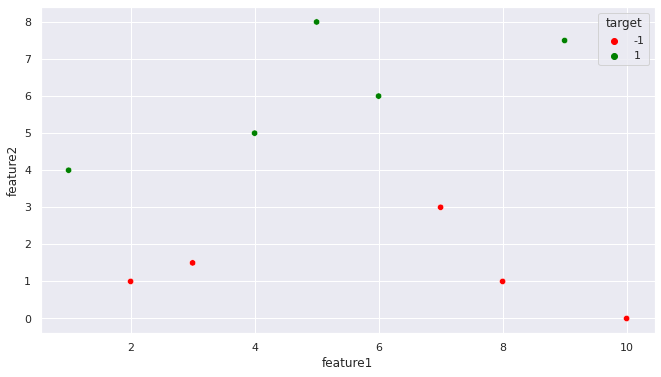

In [4]:
plt.figure(figsize=(11, 6))

sns.scatterplot(data = training_data, x = "feature1", y = "feature2", hue = "target", palette = ["red", "green"], s = 40)
plt.show()

In [17]:
epochs = 5000
lr = 0.005

perc_model = My_Perception_Model()

perc_model.fit(training_df = training_data, inp_cols = ["feature1", "feature2"], target_col = "target", epochs = epochs, lr = lr)

The number of iteration: 5000
Learning rate: 0.005
b: 0.031907277204309054
w1: -0.11336880688535059
w2: 0.1492468677593523


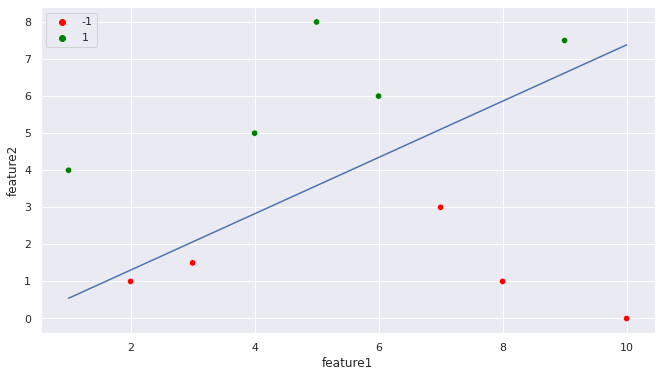

In [18]:
plt.figure(figsize=(11, 6))

m = perc_model.slope
h = perc_model.intercept

training_data['f_pred'] = m * training_data["feature1"] + h

sns.scatterplot(data = training_data, x = "feature1", y = "feature2", hue = "target", palette = ["red", "green"], s = 40)
sns.lineplot(data = training_data, x = "feature1", y = "f_pred")

plt.show()
#It is working pretty well :)))

#Predict the Unseen Data

In [19]:
unseen_data = np.array([6.5, 2])

perc_model.predict(unseen_data)
#As it is expected

-1.0

In [20]:
unseen_data = np.array([6.5, 7])

perc_model.predict(unseen_data)
#As it is expected

1.0

In [21]:
unseen_data = np.array([11, 7])

perc_model.predict(unseen_data)
#As it is expected

-1.0

In [22]:
unseen_data = np.array([11, 11])

perc_model.predict(unseen_data)
#As it is expected

1.0